# Engineering Mathematics Computer Assignment
- **Name**: Kasra Ghorbani
- **Student ID**: 810101489
****
If you have any questions, contact the TAs:
- **Babak Hosseini Mohtasham**:
    - *Email*: babak.hosseini.m@ut.ac.ir
    - *Telegram*: @babakstar
- **Sina**
    - *Email*: msina.parvizi@ut.ac.ir
    - *Telegram*: @Mosipamo

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from sklearn import metrics

# Part 1: Discrete Fourier Series in 1D

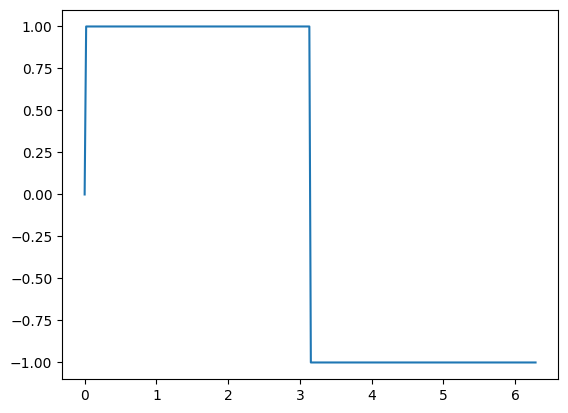

In [2]:
N = 300
x = np.linspace(0, 2 * np.pi, N)
y = np.sign(np.sin(x))
plt.plot(x,y)

In [3]:
def discrete_fourier_series(f, N, n):
    T = 2 * np.pi
    a_n = (2 / N) * np.sum(f * np.cos(2 * np.pi * n * x / T))
    b_n = (2 / N) * np.sum(f * np.sin(2 * np.pi * n * x / T))
    return a_n, b_n

In [4]:
def reconstruct_function(y, x, num_terms):
    x_recon = np.linspace(0, 2 * np.pi, 1000)
    y_recon = []

    a_0, _ = discrete_fourier_series(y, N, 0)

    for t in x_recon:
        f_t = a_0 / 2
        for n in range(1, num_terms + 1):
            a_n, b_n = discrete_fourier_series(y, N, n)
            f_t += a_n * np.cos(n * t) + b_n * np.sin(n * t)
        y_recon.append(f_t)

    return x_recon, y_recon, a_n, b_n, a_0


Loss (n=2): 0.185324
Loss (n=5): 0.063034
Loss (n=10): 0.036572
Loss (n=50): 0.005078


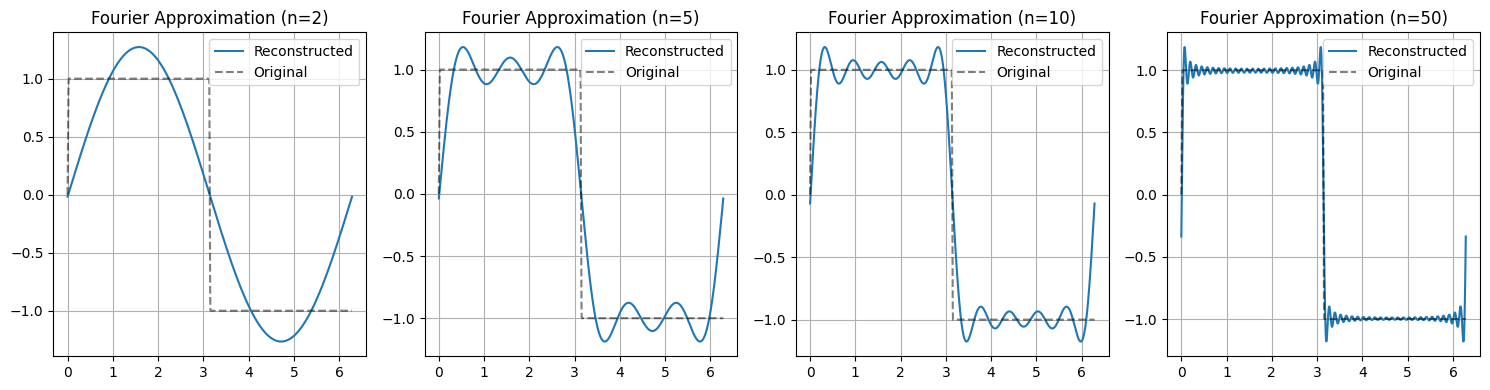

In [5]:
num_terms_list = [2, 5, 10, 50]
resolution = 1000
plt.figure(figsize=(15, 4))
for i, num in enumerate(num_terms_list):
    x_plot, y_recon, a_n, b_n, a_0 = reconstruct_function(y, x, num)
    y_true = np.interp(x_plot, x, y)

    plt.subplot(1, len(num_terms_list), i+1)
    plt.plot(x_plot, y_recon, label='Reconstructed')
    plt.plot(x_plot, y_true, 'k--', alpha=0.5, label='Original')
    plt.title(f"Fourier Approximation (n={num})")
    plt.tight_layout()
    plt.grid(True)
    plt.legend()

    loss = metrics.mean_squared_error(y_true, y_recon)
    print(f"Loss (n={num}): {loss:.6f}")

plt.show()

In [6]:
N = len(x)
for n in range(3):
    a_n, b_n = discrete_fourier_series(y, N, n)
    print(f"n = {n}: a_{n} = {a_n:.6f}, b_{n} = {b_n:.6f}")


n = 0: a_0 = -0.006667, b_0 = 0.000000
n = 1: a_1 = -0.006667, b_1 = 1.268984
n = 2: a_2 = -0.006667, b_2 = -0.000070


Which alligns with by hand computations with a negligible error

# Part 2: Discrete Fourier Series in 2D

## Grayscale image

In [7]:
def load_grayscale_image(path, width, height):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE) / 255.0
    image = cv2.resize(image, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
    return image

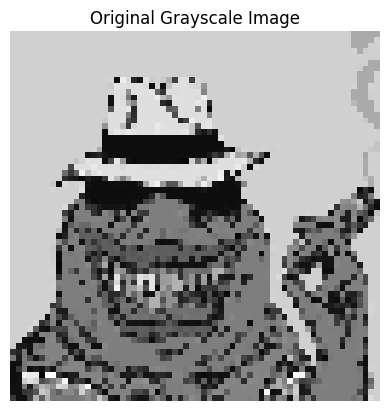

In [8]:
image = load_grayscale_image(r"C:\Users\a\Desktop\dwadaw\photo_2025-07-02_14-42-40.jpg", 64, 64)

plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.show()

In [9]:
def dft2d(image):
    M, N = image.shape
    output = np.zeros((M, N), dtype=np.complex128)
    for k in range(M):
        for l in range(N):
            total = 0.0
            for m in range(M):
                for n in range(N):
                    exponent = -2j * np.pi * (k * m / M + l * n / N)
                    total += image[m, n] * np.exp(exponent)
            output[k, l] = total
    return output

def idft2d(image):
    M, N = image.shape
    output = np.zeros((M, N), dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            total = 0.0
            for k in range(M):
                for l in range(N):
                    exponent = 2j * np.pi * (k * m / M + l * n / N)
                    total += image[k, l] * np.exp(exponent)
            output[m, n] = total / (M * N)
    return output

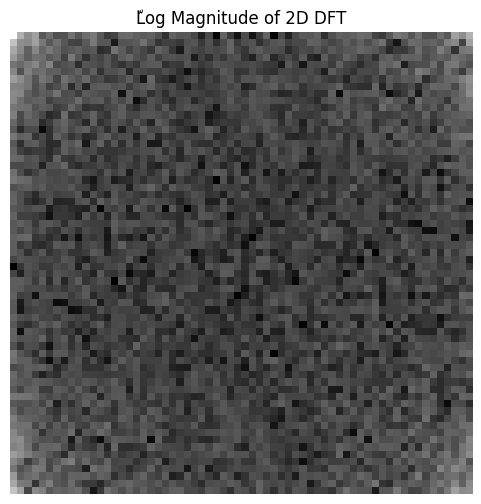

In [10]:
F = dft2d(image)

plt.figure(figsize=(15, 6))
log_magnitude_dft = np.log(1 + np.abs(F))

plt.imshow(log_magnitude_dft, cmap='gray')
plt.title('ّLog Magnitude of 2D DFT')
plt.axis('off')
plt.show()

In [11]:
def compress_image(F, fraction):
    rows, cols = F.shape
    total_area = rows * cols
    keep_area = int(total_area * fraction)
    keep_area_per_corner = keep_area // 4
    keep_rows = int(np.sqrt(keep_area_per_corner * rows / cols))
    keep_cols = int(np.sqrt(keep_area_per_corner * cols / rows))

    compressed = np.zeros_like(F, dtype=complex)
    compressed[:keep_rows, :keep_cols] = F[:keep_rows, :keep_cols]
    compressed[:keep_rows, -keep_cols:] = F[:keep_rows, -keep_cols:]
    compressed[-keep_rows:, :keep_cols] = F[-keep_rows:, :keep_cols]
    compressed[-keep_rows:, -keep_cols:] = F[-keep_rows:, -keep_cols:]

    return compressed

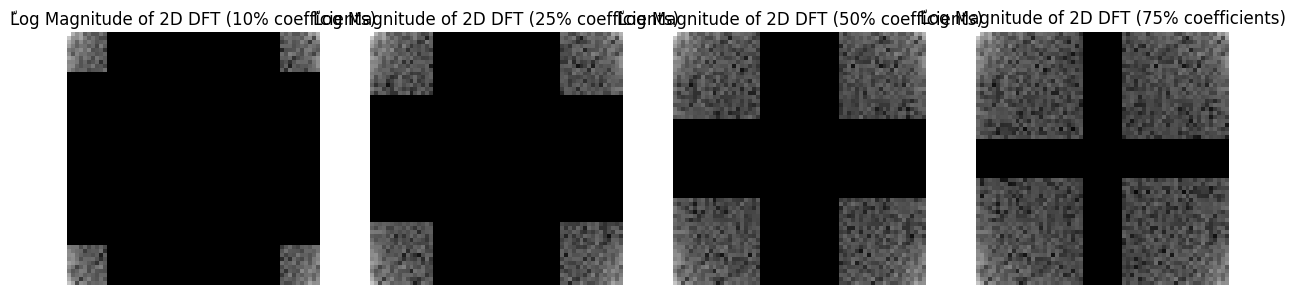

In [12]:
fractions = [0.1, 0.25, 0.5, 0.75]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    plt.subplot(1, len(fractions), i + 1)
    
    compressed_F = compress_image(F, frac)
    log_magnitude_dft = np.log(1 + np.abs(compressed_F))
    
    plt.imshow(log_magnitude_dft, cmap='gray')
    plt.title(f'ّLog Magnitude of 2D DFT ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
plt.show()

Loss (25% coefficients): MSE = 0.016590
Loss (50% coefficients): MSE = 0.009965
Loss (75% coefficients): MSE = 0.005382
Loss (100% coefficients): MSE = 0.000010


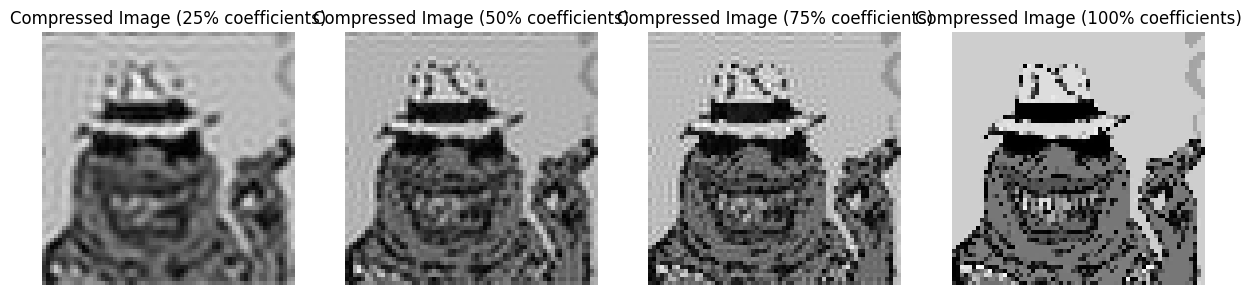

In [13]:
fractions = [0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    compressed_F = compress_image(F, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Compressed Image ({frac *100:.0f}% coefficients)')
    plt.axis('off')

    mse = np.mean((image - reconstructed_image) ** 2)
    print(f"Loss ({frac *100:.0f}% coefficients): MSE = {mse:.6f}")

plt.show()

## Colored image

In [14]:
def load_image(path, width, height):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(width, height),
                       interpolation=cv2.INTER_CUBIC) / 255.0
    return image

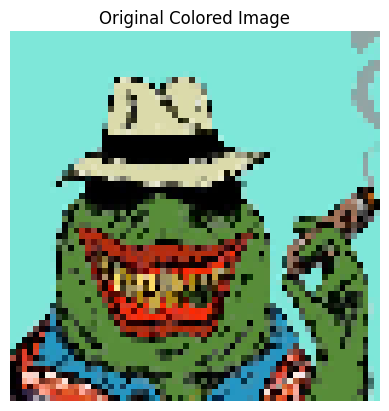

In [15]:
image = load_image(r"C:\Users\a\Desktop\dwadaw\photo_2025-07-02_14-42-40.jpg", 64, 64)
F_rgb = np.zeros_like(image, dtype=complex)

plt.imshow(image, cmap='gray')
plt.title('Original Colored Image')
plt.axis('off')
plt.show()

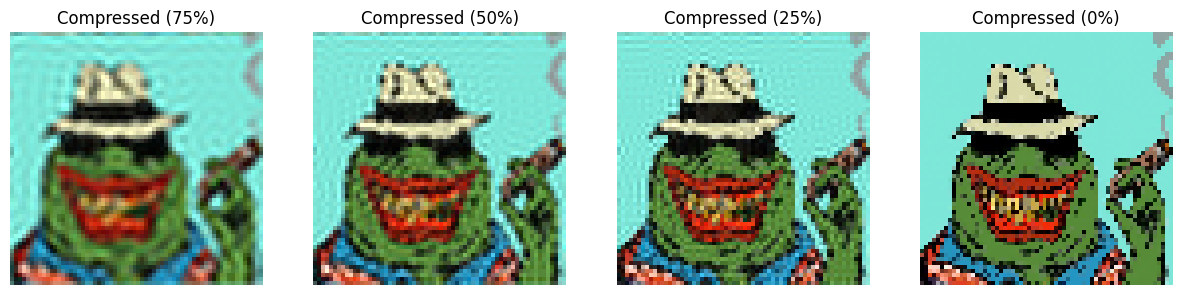

In [16]:
for ch in range(3):
    F_rgb[:, :, ch] = dft2d(image[:, :, ch])

fractions = [0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    reconstructed_channels = []

    for ch in range(3):
        compressed = compress_image(F_rgb[:, :, ch], frac)
        reconstructed = np.abs(idft2d(compressed))
        reconstructed_channels.append(reconstructed)

    reconstructed_image = np.stack(reconstructed_channels, axis=2)
    reconstructed_image = np.clip(reconstructed_image, 0, 1)

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image)
    plt.title(f'Compressed ({100 - frac * 100:.0f}%)')
    plt.axis('off')

plt.show()

The reason we keep the 4 sides of the DFT is to capture both the details (high frequencies) and the overall structure (low frequencies). If we were to keep the top left we would have a sharp image with minimal details and if we kept only the bottom right we would have a blurry image but with higher details